## Modelo para o Sensor CEI

Este dataset **"DataCEI.csv"** possui informações dispostas em colunas sobre as características dos objetos que passam pelo sensor:

* **Tamanho**:  Segue a classificação do CEI2020 (Tamanho='0' - Grande 100%).
* **Referencia**:  Referência dinâmica do *Threshold.
* **NumAmostra**:  Número de amostras adquiridas.
* **Area**:  Somatório das Amplitudes das amostras.
* **Delta**:  Máxima Amplitude da amostra.
* **Output1**:  Peça tipo 1.
* **Output2**:  Peça tipo 2.



### Bibliotecas

In [137]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Função do cáculo da sigmóide
def sigmoid(x):
    return 1/(1+np.exp(-x))

### Carregando os dados

Vamos começar lendo o arquivo DataCEI.csv em um dataframe do pandas.

In [138]:
DataSet=pd.read_csv('arruela_.csv')

In [139]:
DataSet.head()

,Hora,Tamanho,Referencia,NumAmostra,Area,Delta,Output1,Output2
0,13:00:06,53,25,69,81,68,1,0
1,13:00:07,53,26,89,87,56,1,0
2,13:00:08,53,27,68,69,55,1,0
3,13:00:09,53,28,36,50,80,1,0
4,13:00:10,53,29,71,72,50,1,0


In [140]:
#DataSet.drop(['Hora','Tamanho','Referencia','NumAmostra'],axis=1,inplace=True)
#DataSet.drop(['Hora','Tamanho','NumAmostra'],axis=1,inplace=True)
#DataSet.drop(['Hora','NumAmostra'],axis=1,inplace=True)
DataSet.drop(['Hora'],axis=1,inplace=True)

In [141]:
DataSet.head()

,Tamanho,Referencia,NumAmostra,Area,Delta,Output1,Output2
0,53,25,69,81,68,1,0
1,53,26,89,87,56,1,0
2,53,27,68,69,55,1,0
3,53,28,36,50,80,1,0
4,53,29,71,72,50,1,0


In [142]:
DataSet.describe()

,Tamanho,Referencia,NumAmostra,Area,Delta,Output1,Output2
count,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000
mean,53.126437,58.310345,59.777778,63.697318,54.747126,0.375479,0.624521
std,1.174779,9.199888,17.293075,30.629366,35.548413,0.485177,0.485177
min,53.000000,25.000000,3.000000,6.000000,17.000000,0.000000,0.000000
25%,53.000000,54.000000,50.000000,46.000000,38.000000,0.000000,0.000000
50%,53.000000,64.000000,59.000000,56.000000,44.000000,0.000000,1.000000
75%,53.000000,64.000000,69.000000,68.000000,54.000000,1.000000,1.000000
max,64.000000,64.000000,120.000000,201.000000,251.000000,1.000000,1.000000


### Váriaveis do *Dataset*

In [143]:
DataSet.columns

Index(['Tamanho', 'Referencia', 'NumAmostra', 'Area', 'Delta', 'Output1',
       'Output2'],
      dtype='object')

### Número de Peças

#### Vamos classificar os grupos pelo número de peças: 
1. Grupo com uma peça
2. Grupo com duas peças

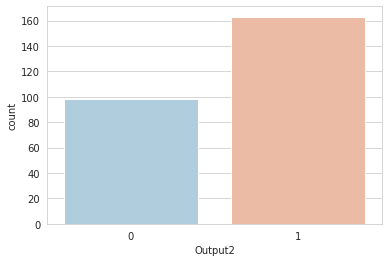

In [144]:
sns.set_style('whitegrid')
sns.countplot(x='Output2',data=DataSet,palette='RdBu_r')
plt.show()

#### Gráfico da distribuição das áreas das peças

/home/ogliari/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


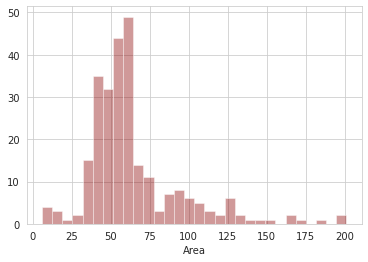

In [145]:
sns.distplot(DataSet['Area'].dropna(),kde=False,color='darkred',bins=30)
plt.show()

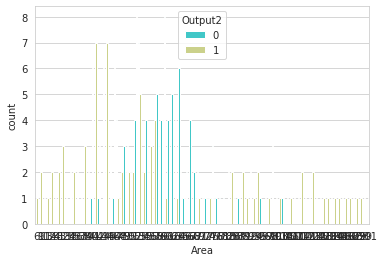

In [146]:
sns.set_style('whitegrid')
sns.countplot(x='Area',hue='Output2',data=DataSet,palette='rainbow')
plt.show()

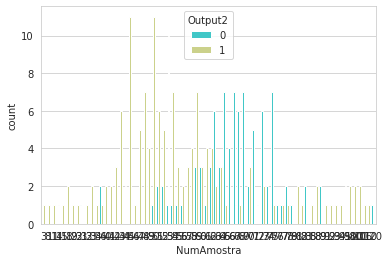

In [147]:
sns.set_style('whitegrid')
sns.countplot(x='NumAmostra',hue='Output2',data=DataSet,palette='rainbow')
plt.show()

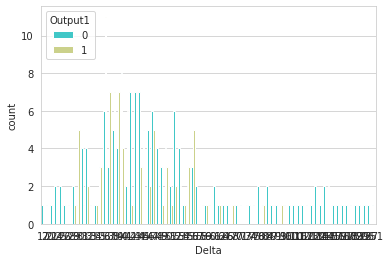

In [148]:
sns.set_style('whitegrid')
sns.countplot(x='Delta',hue='Output1',data=DataSet,palette='rainbow')
plt.show()

## As variáveis preditoras e a variável de resposta

Para treinar o modelo de regressão, primeiro precisaremos dividir nossos dados em uma matriz **X** que contenha os dados das variáveis preditoras e uma matriz **y** com os dados da variável de destino.

### Matrizes X e y

In [149]:
#X = DataSet[[ 'NumAmostra', 'Area', 'Delta']]
#y = DataSet[['Output1','Output2']]

### Relação entre as variáveis preditoras

####  Algumas questões importantes
1. Pelo menos um dos preditores ***x1, x2, ... ,x5***  é útil na previsão da resposta?
2. Todos os preditores ajudam a explicar **y**, ou apenas um subconjunto dos preditores?
3. Quão bem o modelo se ajusta aos dados?
4. Dado um conjunto de valores de previsão, quais valores de resposta devemos prever e quais as métricas indicam um bom modelo de previsão?

**Gráficos simples de dispersão**

Pelos gráficos abaixo percebemos ... nossa variável de resposta

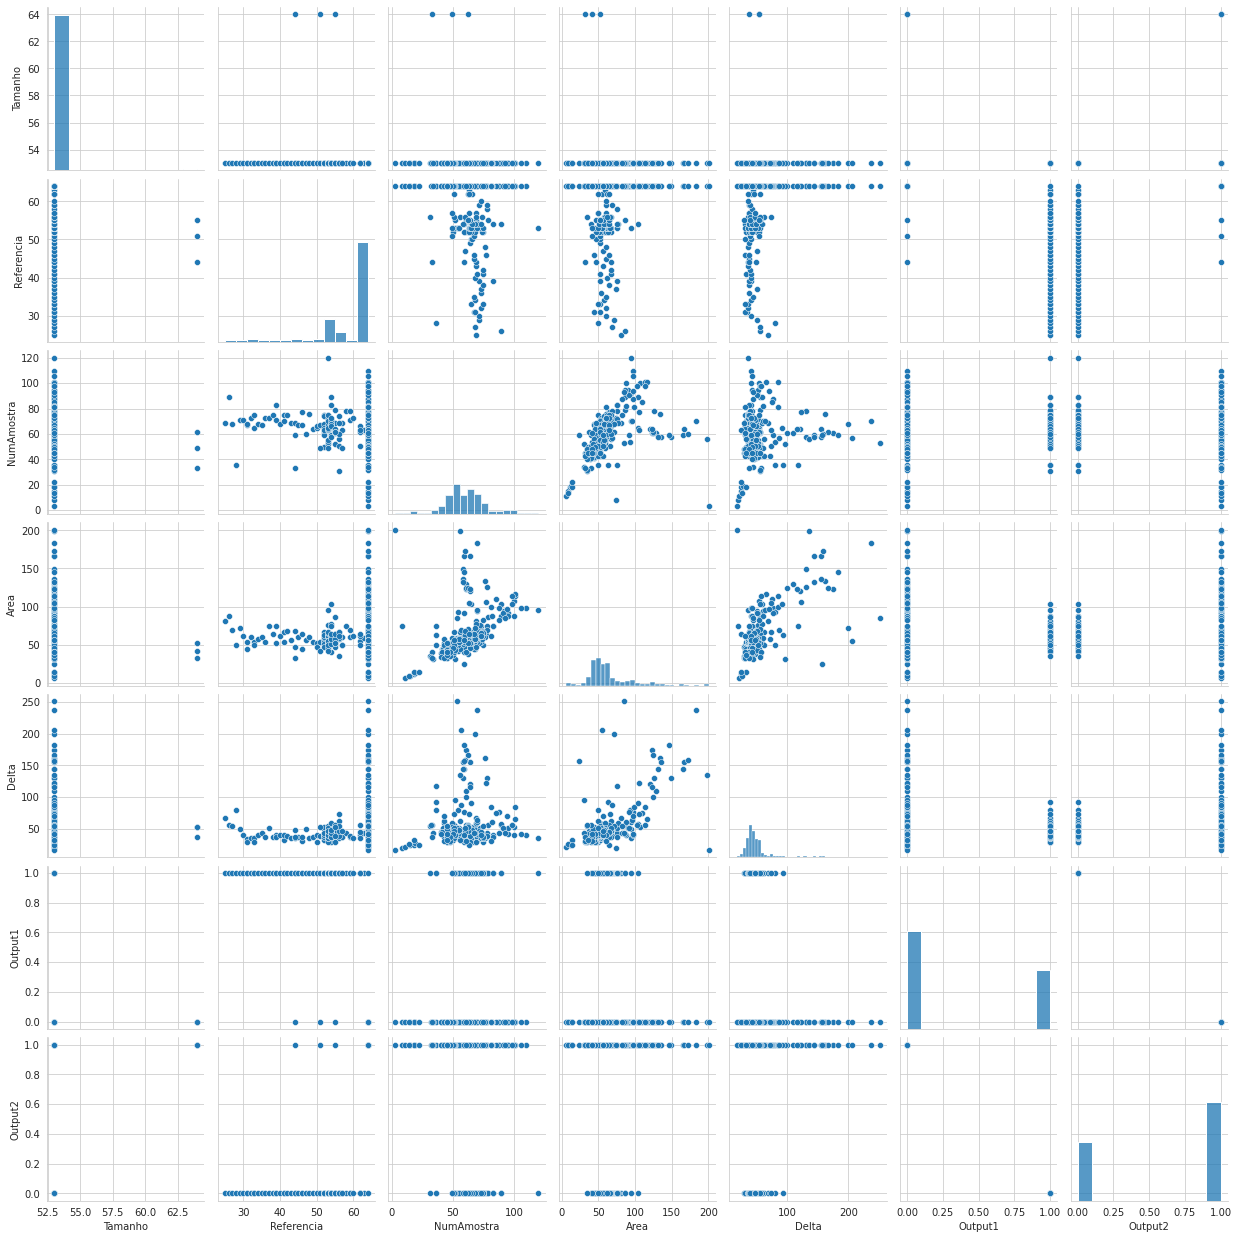

In [150]:
sns.pairplot(DataSet)
plt.show()

**Mapa de Calor**

O gráfico abaixo mostra através de uma escala de cores a correlação entre as variáveis do *Dataset*. Se observarmos as cores deste gráfico, a variável preditora **'Area'** possui maior correlação com a variável de resposta **'Output'** e a variável **'NumAmostra'** a menor.

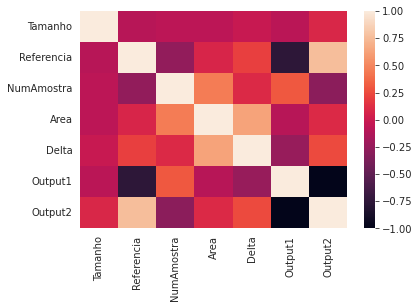

In [151]:
sns.heatmap(DataSet.corr())
plt.show()

## Normalização dos Dados

In [152]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
DataScaled=scaler.fit_transform(DataSet)
#DataSetScaled=pd.DataFrame(np.array(DataScaled),columns = ['NumAmostra', 'Area', 'Delta', 'Output1','Output2'])
DataSetScaled=pd.DataFrame(np.array(DataScaled),columns = DataSet.columns )


In [153]:
DataSetScaled.head()

,Tamanho,Referencia,NumAmostra,Area,Delta,Output1,Output2
0,-0.107833,-3.627690,0.534314,0.565990,0.373528,1.289676,-1.289676
1,-0.107833,-3.518784,1.693069,0.762257,0.035312,1.289676,-1.289676
2,-0.107833,-3.409879,0.476377,0.173457,0.007127,1.289676,-1.289676
3,-0.107833,-3.300973,-1.377630,-0.448055,0.711745,1.289676,-1.289676
4,-0.107833,-3.192067,0.650190,0.271590,-0.133796,1.289676,-1.289676


### Conjunto de dados para o treinamento

In [154]:
X = DataSetScaled.drop(['Output1', 'Output2'],axis=1)
y = DataSet[['Output1','Output2']]

## Separando os dados de treinamento e de validação

Agora vamos dividir os dados em um conjunto de treinamento e um conjunto de testes. Vamos treinar o modelo no conjunto de treinamento, em seguida, usar o conjunto de teste para validar o modelo.

Em nosso exemplo iremos separar de forma randômica 33% dos dados para validação. Estes dados não serão utilizados para determinação dos coeficientes preditores do modelo. 


In [155]:
from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

print(y_test)
print(X_test)

     Output1  Output2
30         1        0
143        0        1
170        0        1
73         1        0
159        0        1
..       ...      ...
137        0        1
82         1        0
127        0        1
124        0        1
142        0        1

[79 rows x 2 columns]
      Tamanho  Referencia  NumAmostra      Area     Delta
30  -0.107833   -1.013951    0.244626 -0.349921 -0.500197
143 -0.107833    0.619637    0.592252  1.056657  0.260789
170 -0.107833    0.619637    0.128750 -0.840588 -0.218350
73  -0.107833   -0.578327    0.881941 -0.055521 -0.528382
159 -0.107833    0.619637   -0.566502 -0.677033 -0.584751
..        ...         ...         ...       ...       ...
137 -0.107833    0.619637    0.244626  1.874436  1.867317
82  -0.107833   -0.578327   -0.624440 -0.480766 -0.218350
127 -0.107833    0.619637   -1.030004 -0.578899 -0.077427
124 -0.107833    0.619637    0.070813  2.136125  1.557285
142 -0.107833    0.619637    1.808944  0.925813 -0.105612

[79 rows x 5 col

## Criando o Modelo de MPL

In [156]:
#Tamanho do DataSet de Treinamento
n_records, n_features = X_train.shape

#Arquitetura da MPL
N_input = 5
N_hidden = 8
N_output = 2
learnrate = 0.1

## Inicialização dos pesos da MPL (Aleatório)

In [157]:
#Pesos da Camada Oculta (Inicialização Aleatória)
weights_input_hidden = np.random.normal(0, scale=0.1, size=(N_input, N_hidden))
print('Pesos da Camada Oculta:')
print(weights_input_hidden)

#Pesos da Camada de Saída (Inicialização Aleatória)
weights_hidden_output = np.random.normal(0, scale=0.1, size=(N_hidden, N_output))
print('Pesos da Camada de Saída:')
print(weights_hidden_output)

Pesos da Camada Oculta:
[[-0.08837562 -0.04042434  0.016298    0.02437325  0.13305315  0.04848961
  -0.09901918 -0.04060036]
 [-0.14203771 -0.00667013 -0.14589399 -0.09076654 -0.16188801 -0.02341402
  -0.04746763 -0.07050579]
 [-0.2071021  -0.11689722 -0.1322275  -0.01922263 -0.03252716 -0.05029131
   0.08613258  0.18942374]
 [-0.02305475 -0.17653771 -0.11669947 -0.04773203 -0.19865815  0.02104554
   0.12941259  0.12214524]
 [-0.05876476 -0.04557492  0.0602292  -0.08497431 -0.17468747 -0.0635325
   0.05134756  0.00961385]]
Pesos da Camada de Saída:
[[ 0.13974161 -0.03464226]
 [ 0.0899239   0.07647478]
 [ 0.00689779  0.02499929]
 [ 0.00767984 -0.09183533]
 [-0.03432903 -0.09706265]
 [-0.02882581  0.03531712]
 [-0.03208562  0.08489027]
 [-0.03319335  0.05195426]]


## Algoritmo Backpropagation

In [158]:
epochs = 200000
last_loss=None
EvolucaoError=[]
IndiceError=[]

for e in range(epochs):
    delta_w_i_h = np.zeros(weights_input_hidden.shape)
    delta_w_h_o = np.zeros(weights_hidden_output.shape)
    for xi, yi in zip(X_train.values, y_train.values):
        
# Forward Pass
        #Camada oculta
        #Calcule a combinação linear de entradas e pesos sinápticos
        hidden_layer_input = np.dot(xi, weights_input_hidden)
        #Aplicado a função de ativação
        hidden_layer_output = sigmoid(hidden_layer_input)
    
        #Camada de Saída
        #Calcule a combinação linear de entradas e pesos sinápticos
        output_layer_in = np.dot(hidden_layer_output, weights_hidden_output)

        #Aplicado a função de ativação 
        output = sigmoid(output_layer_in)
        #print('As saídas da rede são',output)
#-------------------------------------------    
    
# Backward Pass
        ## TODO: Cálculo do Erro
        error = yi - output
    
        # TODO: Calcule o termo de erro de saída (Gradiente da Camada de Saída)
        output_error_term = error * output * (1 - output)

        # TODO: Calcule a contribuição da camada oculta para o erro
        hidden_error = np.dot(weights_hidden_output,output_error_term)
    
        # TODO: Calcule o termo de erro da camada oculta (Gradiente da Camada Oculta)
        hidden_error_term = hidden_error * hidden_layer_output * (1 - hidden_layer_output)
    
        # TODO: Calcule a variação do peso da camada de saída
        delta_w_h_o += output_error_term*hidden_layer_output[:, None]

        # TODO: Calcule a variação do peso da camada oculta
        delta_w_i_h += hidden_error_term * xi[:, None]
        
    #Atualização dos pesos na época em questão
    weights_input_hidden += learnrate * delta_w_i_h / n_records
    weights_hidden_output += learnrate * delta_w_h_o / n_records
    
    
    # Imprimir o erro quadrático médio no conjunto de treinamento
    
    if  e % (epochs / 20) == 0:
        hidden_output = sigmoid(np.dot(xi, weights_input_hidden))
        out = sigmoid(np.dot(hidden_output,
                             weights_hidden_output))
        loss = np.mean((out - yi) ** 2)

        if last_loss and last_loss < loss:
            print("Erro quadrático no treinamento: ", loss, " Atenção: O erro está aumentando")
        else:
            print("Erro quadrático no treinamento: ", loss)
        last_loss = loss
         
        EvolucaoError.append(loss)
        IndiceError.append(e)

Erro quadrático no treinamento:  0.25559915982631964
Erro quadrático no treinamento:  0.005059204461951024
Erro quadrático no treinamento:  0.004545190224256732
Erro quadrático no treinamento:  0.004433518649599796
Erro quadrático no treinamento:  0.0044766037084441115  Atenção: O erro está aumentando
Erro quadrático no treinamento:  0.004568691013316262  Atenção: O erro está aumentando
Erro quadrático no treinamento:  0.004648134550918347  Atenção: O erro está aumentando
Erro quadrático no treinamento:  0.004684291953724903  Atenção: O erro está aumentando
Erro quadrático no treinamento:  0.004661343823568998
Erro quadrático no treinamento:  0.0045754095657567885
Erro quadrático no treinamento:  0.004434668389936387
Erro quadrático no treinamento:  0.004254276278358881
Erro quadrático no treinamento:  0.0040506639456638184
Erro quadrático no treinamento:  0.00383803133439933
Erro quadrático no treinamento:  0.0036269805292493316
Erro quadrático no treinamento:  0.003424550382719379
Er

In [159]:
### Gráfico da Evolução do Erro

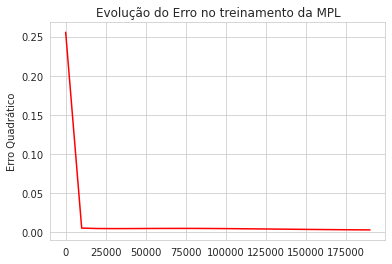

In [160]:
plt.plot(IndiceError, EvolucaoError, 'r') # 'r' is the color red
plt.xlabel('')
plt.ylabel('Erro Quadrático')
plt.title('Evolução do Erro no treinamento da MPL')
plt.show()

## Validação do modelo

In [161]:
# Calcule a precisão dos dados de teste
n_records, n_features = X_test.shape
predictions=0

for xi, yi in zip(X_test.values, y_test.values):

# Forward Pass
        #Camada oculta
        #Calcule a combinação linear de entradas e pesos sinápticos
        hidden_layer_input = np.dot(xi, weights_input_hidden)
        #Aplicado a função de ativação
        hidden_layer_output = sigmoid(hidden_layer_input)
    
        #Camada de Saída
        #Calcule a combinação linear de entradas e pesos sinápticos
        output_layer_in = np.dot(hidden_layer_output, weights_hidden_output)

        #Aplicado a função de ativação 
        output = sigmoid(output_layer_in)

#-------------------------------------------    
    
#Cálculo do Erro da Predição
        ## TODO: Cálculo do Erro        
        if (output[0]>output[1]):
            if (yi[0]>yi[1]):
                predictions+=1
                
        if (output[1]>=output[0]):
            if (yi[1]>yi[0]):
                predictions+=1

print("A Acurácia da Predição é de: {:.3f}".format(predictions/n_records))
 


A Acurácia da Predição é de: 1.000
